In [ ]:
pip install py-readability-metrics

In [ ]:
pip install nltk

In [ ]:
pip install textstat

In [ ]:
pip install pyspellchecker

In [ ]:
pip install deepmultilingualpunctuation

In [ ]:
pip install imbalanced-learn

In [ ]:
pip install scikit-learn==1.4

In [895]:
from sklearn.utils import check_array
import numpy
import imblearn
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')
from readability import Readability
from textstat import textstat
from nltk import punkt 
from spellchecker import SpellChecker 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
spell = SpellChecker()

## Import Data

In [4]:
df = pd.read_csv("C://Users/lizok/Desktop/Project 2/asap-aes/training_set_rel3.tsv", delimiter="\t", encoding="latin-1")

In [5]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


# EDF

## Word Count

In [6]:
df_modified = df[['essay_id', 'essay_set', 'essay', 
           'domain1_score', 'domain2_score']].copy()
df_modified

,essay_set,essay,domain1_score,domain2_score
0,1,"Dear local newspaper, I think effects computer...",8,NaN
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN
...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,35,NaN
12972,8,I never understood the meaning laughter is th...,32,NaN
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN
12974,8,Trippin' on fen...,40,NaN


In [7]:
df_modified['word_count'] = df_modified.essay.apply(lambda x: len(str(x).split()))

In [8]:
df_modified

,essay_set,essay,domain1_score,domain2_score,word_count
0,1,"Dear local newspaper, I think effects computer...",8,NaN,338
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN,419
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN,279
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN,524
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN,465
...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,35,NaN,845
12972,8,I never understood the meaning laughter is th...,32,NaN,546
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN,817
12974,8,Trippin' on fen...,40,NaN,562


## Redability metrics 
Redability metrics give an estimate of the text. They correspond to the U.S grade level of education which varies from 0-18  

In [9]:
# Flesch-Kincaid Grade Level
def FK(text):
    if (len(text.split()) > 101):
        r = Readability(text)
        fk = r.flesch_kincaid()
        score = fk.score
    else:
        score = 0
    return score

# Dale Chall Readability
def DCR(text):
    if (len(text.split()) > 101):
        r = Readability(text)
        dc = r.dale_chall()
        score = dc.score
    else:
        score = 0
    
    return score

# Coleman Liau Index
def CLI(text):
    if (len(text.split()) > 101):
        r = Readability(text)
        cl = r.coleman_liau()
        score = cl.score
    else:
        score = 0
    
    return score

# Apply the functions to each row in the DataFrame
df_modified['FK'] = df_modified['essay'].apply(FK)
df_modified['DCR'] = df_modified['essay'].apply(DCR)
df_modified['CLI'] = df_modified['essay'].apply(CLI)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,domain1_score,domain2_score,word_count,FK,DCR,CLI
0,1,"Dear local newspaper, I think effects computer...",8,NaN,338,8.497936,7.123929,8.168300
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN,419,9.247143,7.610529,8.536476
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN,279,8.773538,7.624491,8.848029
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN,524,10.259448,9.466299,11.559547
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN,465,7.480907,6.677189,8.300172
...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,35,NaN,845,11.699953,7.864003,7.494142
12972,8,I never understood the meaning laughter is th...,32,NaN,546,4.922048,7.331160,5.002639
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN,817,8.817565,8.078353,8.447905
12974,8,Trippin' on fen...,40,NaN,562,6.510486,7.640047,6.907387


In [10]:
df_modified.loc[df_modified['FK'] == 0].count()

essay_set        3412
essay            3412
domain1_score    3412
domain2_score      43
word_count       3412
FK               3412
DCR              3412
CLI              3412
dtype: int64

## Lexical measures

### Lexical diversity

In [11]:
pip install lexical-diversity

Note: you may need to restart the kernel to use updated packages.


In [12]:
from lexical_diversity import lex_div as ld

In [13]:
# Measure of lexical textual diversity (MTLD)
def MTLD(text):
    flt = ld.flemmatize(text)
    score = ld.mtld(flt)
    return score

# Apply the functions to each row in the DataFrame
df_modified['MTLD'] = df_modified['essay'].apply(MTLD)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD
0,1,"Dear local newspaper, I think effects computer...",8,NaN,338,8.497936,7.123929,8.168300,81.724520
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN,419,9.247143,7.610529,8.536476,80.551938
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN,279,8.773538,7.624491,8.848029,65.733843
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN,524,10.259448,9.466299,11.559547,71.269453
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN,465,7.480907,6.677189,8.300172,47.805534
...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,35,NaN,845,11.699953,7.864003,7.494142,74.744941
12972,8,I never understood the meaning laughter is th...,32,NaN,546,4.922048,7.331160,5.002639,58.847341
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN,817,8.817565,8.078353,8.447905,72.512323
12974,8,Trippin' on fen...,40,NaN,562,6.510486,7.640047,6.907387,63.941469


## Syntactic structure measures

In [14]:
# Average word length in the sentence
def Words(text):
    words = text.split()
    average = sum(map(len, words)) / len(words)
    return average

# Average sentence length in the text
def Sentence(text):
    sentences = text.split(".") 
    words = text.split(" ") 
    if(sentences[len(sentences)-1]==""): # if the last value in sentences is an empty string
        average = len(words) / len(sentences)-1
    else:
        average = len(words) / len(sentences)
    return average

# Average length of sentences in the clause
def Clause(text):
    clause = text.split("  ")
    sentences = text.split(".")
    if(clause[len(clause)-1]==""): # if the last value in clause is an empty string
        average = len(sentences) / len(clause)-1
    else:
        average = len(sentences) / len(clause)
    return average

# Apply the functions to each row in the DataFrame
df_modified['Words_AV'] = df_modified['essay'].apply(Words)
df_modified['Sentence_AV'] = df_modified['essay'].apply(Sentence)
df_modified['Clause_AV'] = df_modified['essay'].apply(Clause)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV
0,1,"Dear local newspaper, I think effects computer...",8,NaN,338,8.497936,7.123929,8.168300,81.724520,4.550296,29.727273,11.000000
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN,419,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN,279,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN,524,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN,465,7.480907,6.677189,8.300172,47.805534,4.526882,14.000000,31.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,35,NaN,845,11.699953,7.864003,7.494142,74.744941,4.274556,29.285714,9.333333
12972,8,I never understood the meaning laughter is th...,32,NaN,546,4.922048,7.331160,5.002639,58.847341,4.155678,15.117647,17.000000
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN,817,8.817565,8.078353,8.447905,72.512323,4.626683,21.526316,38.000000
12974,8,Trippin' on fen...,40,NaN,562,6.510486,7.640047,6.907387,63.941469,4.434164,13.487805,2.411765


## Quality measures

### Misspelling score

In [18]:
# Misspelling score
def misspell(text):
    data = text.split(" ")
    data = len(spell.unknown(data))
    return data
    
# Apply the functions to each row in the DataFrame
df_modified['Misspells_count'] = df_modified['essay'].apply(misspell)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,1,"Dear local newspaper, I think effects computer...",8,NaN,338,8.497936,7.123929,8.168300,81.724520,4.550296,29.727273,11.000000,45
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN,419,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000,43
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN,279,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000,28
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN,524,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000,80
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN,465,7.480907,6.677189,8.300172,47.805534,4.526882,14.000000,31.000000,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,35,NaN,845,11.699953,7.864003,7.494142,74.744941,4.274556,29.285714,9.333333,99
12972,8,I never understood the meaning laughter is th...,32,NaN,546,4.922048,7.331160,5.002639,58.847341,4.155678,15.117647,17.000000,79
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN,817,8.817565,8.078353,8.447905,72.512323,4.626683,21.526316,38.000000,117
12974,8,Trippin' on fen...,40,NaN,562,6.510486,7.640047,6.907387,63.941469,4.434164,13.487805,2.411765,85


# Balancing and Modeling

In [609]:
df_balanced = df_modified.copy()

In [610]:
df_balanced = df_balanced.drop(columns="essay")

In [612]:
df_balanced = df_balanced.fillna(0)
df_balanced

,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,1,8,0.0,338,8.497936,7.123929,8.168300,81.724520,4.550296,29.727273,11.000000,45
1,1,9,0.0,419,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000,43
2,1,7,0.0,279,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000,28
3,1,10,0.0,524,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000,80
4,1,8,0.0,465,7.480907,6.677189,8.300172,47.805534,4.526882,14.000000,31.000000,50
...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,35,0.0,845,11.699953,7.864003,7.494142,74.744941,4.274556,29.285714,9.333333,99
12972,8,32,0.0,546,4.922048,7.331160,5.002639,58.847341,4.155678,15.117647,17.000000,79
12973,8,40,0.0,817,8.817565,8.078353,8.447905,72.512323,4.626683,21.526316,38.000000,117
12974,8,40,0.0,562,6.510486,7.640047,6.907387,63.941469,4.434164,13.487805,2.411765,85


In [613]:
df_balanced.domain2_score = df_balanced.domain2_score.astype(int)
df_balanced.domain1_score = df_balanced.domain1_score.astype(int)
df_balanced.essay_set = df_balanced.essay_set.astype(int)
df_balanced

,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,1,8,0,338,8.497936,7.123929,8.168300,81.724520,4.550296,29.727273,11.000000,45
1,1,9,0,419,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000,43
2,1,7,0,279,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000,28
3,1,10,0,524,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000,80
4,1,8,0,465,7.480907,6.677189,8.300172,47.805534,4.526882,14.000000,31.000000,50
...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,35,0,845,11.699953,7.864003,7.494142,74.744941,4.274556,29.285714,9.333333,99
12972,8,32,0,546,4.922048,7.331160,5.002639,58.847341,4.155678,15.117647,17.000000,79
12973,8,40,0,817,8.817565,8.078353,8.447905,72.512323,4.626683,21.526316,38.000000,117
12974,8,40,0,562,6.510486,7.640047,6.907387,63.941469,4.434164,13.487805,2.411765,85


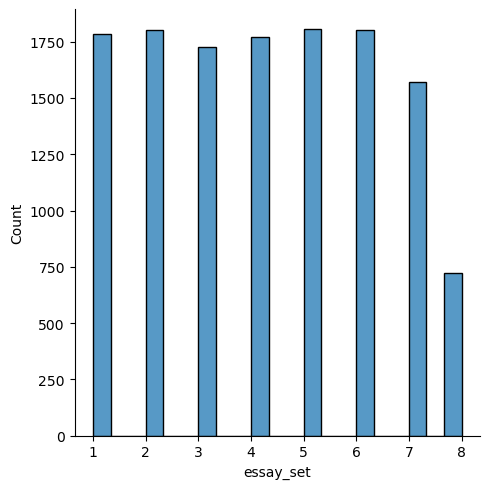

In [614]:
sns.displot(data=df_balanced,x="essay_set")  

In [615]:
df_balanced.groupby(["essay_set"]).essay_set.count()

essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
Name: essay_set, dtype: int64

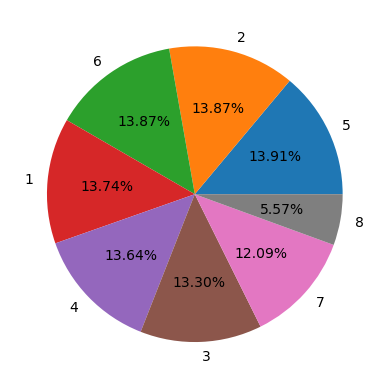

In [616]:
plt.pie(df_balanced.essay_set.value_counts(),labels=df_balanced.essay_set.value_counts().index,autopct='%1.2f%%')
plt.show()

In [617]:
df_balanced.groupby(["essay_set","domain1_score"]).essay_set.count()

essay_set  domain1_score
1          2                 10
           3                  1
           4                 17
           5                 17
           6                110
                           ... 
8          48                 3
           49                 2
           50                13
           55                 2
           60                 1
Name: essay_set, Length: 92, dtype: int64

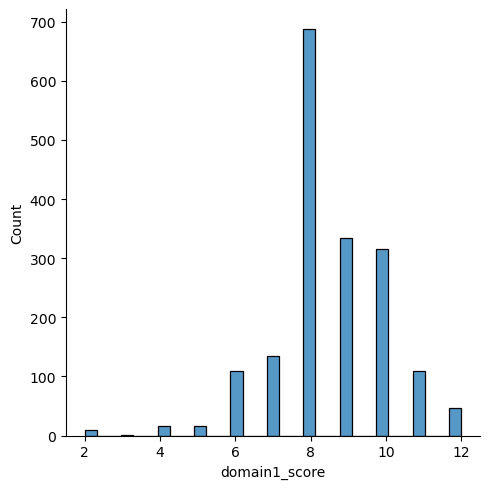

In [618]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 1].domain1_score)

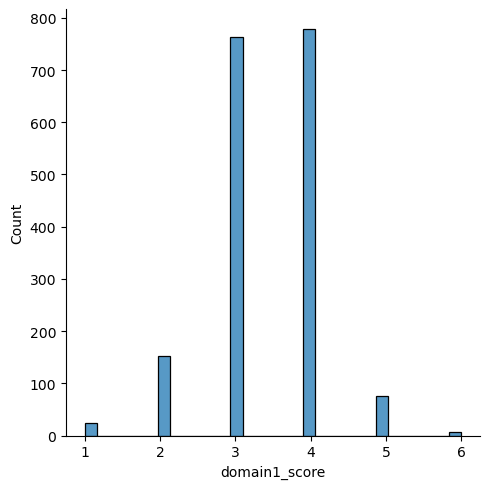

In [619]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 2].domain1_score)

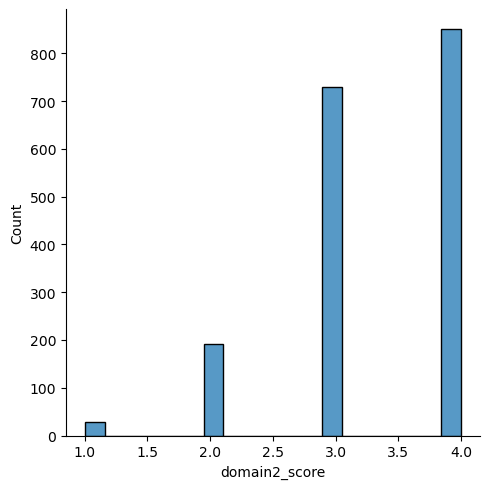

In [620]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 2].domain2_score)

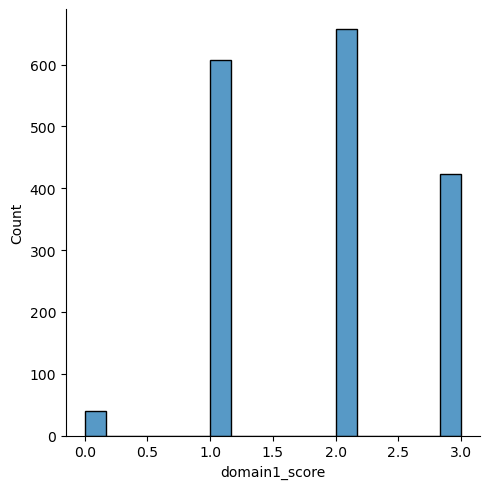

In [621]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 3].domain1_score)

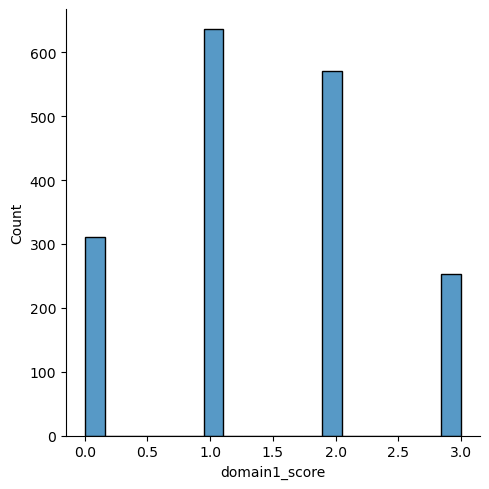

In [622]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 4].domain1_score)

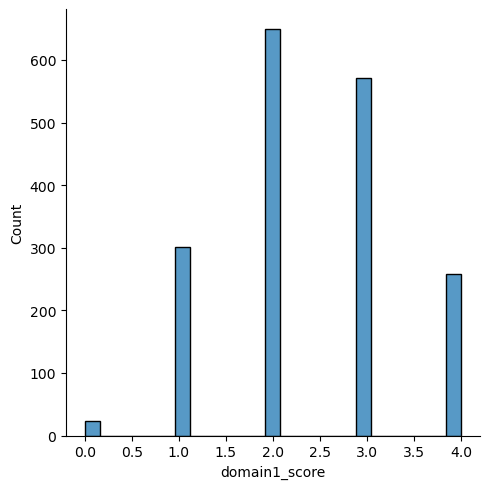

In [623]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 5].domain1_score)

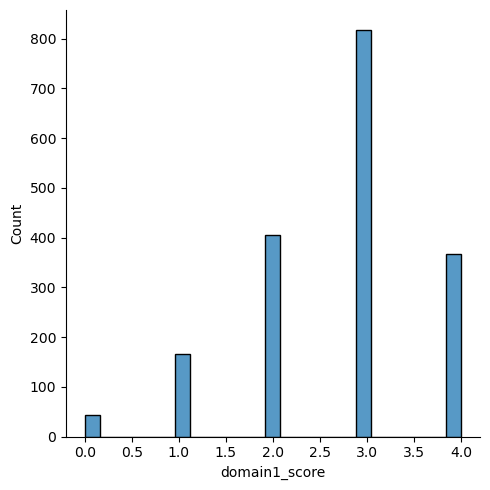

In [624]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 6].domain1_score)

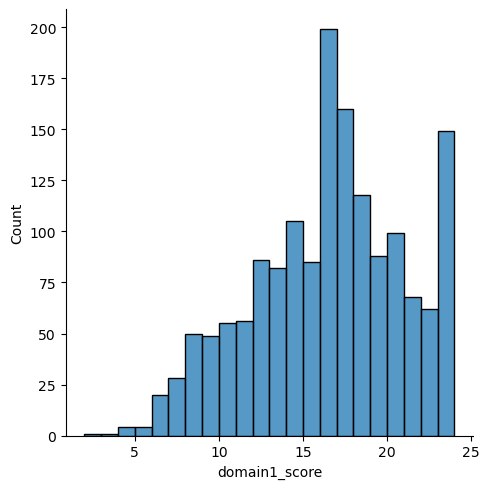

In [625]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 7].domain1_score)

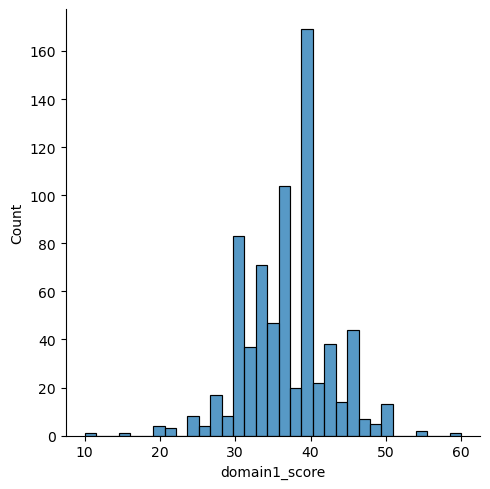

In [626]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 8].domain1_score)

In [627]:
df_balanced.groupby(["essay_set"]).essay_set.count()

essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
Name: essay_set, dtype: int64

## Training without balancing

In [842]:
final_results = pd.DataFrame(
    columns=["without_balancing","only_essay_sets", 'only_score', "bal_sets_and_score", "bal_sets_but_notBall_rows"],index=["domain1","domain2"]
)

In [843]:
def train(value):
    x_train = df_train.loc[:,['essay_set','word_count','FK','DCR','CLI','MTLD','Words_AV','Sentence_AV','Clause_AV','Misspells_count']].values
    y_train = df_train.loc[:,value].values
    x_test = df_test.loc[:,['essay_set','word_count','FK','DCR','CLI','MTLD','Words_AV','Sentence_AV','Clause_AV','Misspells_count']].values
    y_test = df_test.loc[:,value].values
    
    # here we initialize the model
    lr_model = LogisticRegression(random_state=0,max_iter=1000)
    
    # here we train the model on the training data
    lr_model.fit(X=x_train, y=y_train)
    y_test_predicted = lr_model.predict(x_test)
    print(y_test_predicted)
    print(y_test)
    
    #here we print the result
    percent = (y_test_predicted == y_test).sum()/len(y_test)
    print("Percent of similarity: ", percent)
    report =classification_report(y_true=y_test, y_pred=y_test_predicted)
    print(report)
    return round(percent,3)

In [844]:
df_train, df_test = train_test_split(df_balanced,test_size = 0.2)

In [845]:
len(df_balanced)

12976

In [846]:
len(df_train)

10380

In [847]:
len(df_test)

2596

In [848]:
df_train.groupby(["essay_set"]).essay_set.count()

essay_set
1    1438
2    1443
3    1394
4    1413
5    1448
6    1450
7    1220
8     574
Name: essay_set, dtype: int64

In [849]:
df_test.groupby(["essay_set"]).essay_set.count()

essay_set
1    345
2    357
3    332
4    357
5    357
6    350
7    349
8    149
Name: essay_set, dtype: int64

In [850]:
final_results.iloc[0,0] = train('domain1_score')

[1 2 2 ... 2 2 3]
[2 3 2 ... 2 2 3]
Percent of similarity:  0.474191063174114
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.56      0.69      0.62       349
           2       0.53      0.52      0.53       487
           3       0.53      0.76      0.62       521
           4       0.56      0.45      0.50       298
           5       0.25      0.04      0.07        26
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00        30
           8       0.49      0.73      0.59       136
           9       0.33      0.03      0.05        68
          10       0.32      0.37      0.34        76
          11       0.00      0.00      0.00        34
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        19
          14       0.15      0.12      0.13        26
          15       0.00      0.00      0.00        18
   

In [851]:
final_results.iloc[1,0] =train('domain2_score')

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Percent of similarity:  0.9387519260400616
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2239
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        33
           3       0.55      0.54      0.55       140
           4       0.68      0.75      0.71       175

    accuracy                           0.94      2596
   macro avg       0.44      0.46      0.45      2596
weighted avg       0.93      0.94      0.93      2596



## Traning only with balancing essay sets

In [852]:
def smt(df, y_column):
    x = df.values
    y = [0]*len(df)
    y = df.loc[:, y_column].values
    counter = Counter(y)
    print(counter)
    oversample = SMOTE()
    x, y = oversample.fit_resample(x, y)
    counter = Counter(y)
    print(counter)
    x = pd.DataFrame(x, columns=['essay_set','domain1_score','domain2_score','word_count','FK','DCR','CLI','MTLD','Words_AV','Sentence_AV','Clause_AV','Misspells_count'])
    return x

In [853]:
df_final_with_bal_sets = smt(df_balanced.loc[(df_balanced['essay_set'] == 7) | (df_balanced['essay_set'] == 8)], 'essay_set')
df_final_with_bal_sets

Counter({7: 1569, 8: 723})
Counter({7: 1569, 8: 1569})


,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,7.0,15.000000,0.0,90.000000,0.000000,0.000000,0.000000,39.271357,4.422222,6.583333,6.000000,12.000000
1,7.0,13.000000,0.0,94.000000,0.000000,0.000000,0.000000,46.762626,3.882979,22.750000,2.000000,15.000000
2,7.0,15.000000,0.0,154.000000,61.118098,15.402404,5.915092,53.933145,3.974026,39.750000,0.666667,19.000000
3,7.0,17.000000,0.0,217.000000,6.008752,7.032910,4.478627,53.212299,4.184332,12.562500,16.000000,44.000000
4,7.0,13.000000,0.0,151.000000,5.400975,6.081247,5.560000,40.279501,4.364238,10.615385,13.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3133,8.0,38.199503,0.0,848.000000,3.844680,8.646492,6.046734,84.886824,4.616819,13.612377,2.764725,146.201989
3134,8.0,39.329141,0.0,525.329141,5.521549,6.493997,5.869320,70.999537,4.140818,13.995266,9.819707,60.974843
3135,8.0,42.584731,0.0,759.315645,6.090424,7.649320,7.348501,80.505721,4.514322,14.118013,9.858473,109.634543
3136,8.0,37.627531,0.0,843.748988,4.974831,6.977179,6.145266,64.269650,4.339483,11.137393,65.419025,126.995951


In [854]:
df_final_with_bal_sets =  pd.concat([df_final_with_bal_sets, df_balanced]).drop_duplicates().reset_index(drop=True)
df_final_with_bal_sets['domain1_score'] = df_final_with_bal_sets['domain1_score'].astype(int)
df_final_with_bal_sets['domain2_score'] = df_final_with_bal_sets['domain2_score'].astype(int)
df_final_with_bal_sets['essay_set'] = df_final_with_bal_sets['essay_set'].astype(int)
df_final_with_bal_sets

,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,7,15,0,90.0,0.000000,0.000000,0.000000,39.271357,4.422222,6.583333,6.000000,12.0
1,7,13,0,94.0,0.000000,0.000000,0.000000,46.762626,3.882979,22.750000,2.000000,15.0
2,7,15,0,154.0,61.118098,15.402404,5.915092,53.933145,3.974026,39.750000,0.666667,19.0
3,7,17,0,217.0,6.008752,7.032910,4.478627,53.212299,4.184332,12.562500,16.000000,44.0
4,7,13,0,151.0,5.400975,6.081247,5.560000,40.279501,4.364238,10.615385,13.000000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13815,6,0,0,154.0,8.552850,7.928817,8.758471,46.377525,4.597403,11.833333,12.000000,21.0
13816,6,2,0,67.0,0.000000,0.000000,0.000000,72.778750,4.850746,15.750000,4.000000,5.0
13817,6,3,0,105.0,10.231615,8.773927,9.437064,73.371184,4.790476,16.500000,6.000000,10.0
13818,6,2,0,68.0,0.000000,0.000000,0.000000,53.566459,4.529412,21.666667,3.000000,4.0


In [855]:
df_train, df_test = train_test_split(df_final_with_bal_sets,test_size = 0.2)

In [856]:
len(df_final_with_bal_sets)

13820

In [857]:
len(df_train)

11056

In [858]:
len(df_test)

2764

In [859]:
df_train.groupby(["essay_set"]).essay_set.count()

essay_set
1    1434
2    1422
3    1388
4    1404
5    1467
6    1454
7    1228
8    1259
Name: essay_set, dtype: int64

In [860]:
df_test.groupby(["essay_set"]).essay_set.count()

essay_set
1    349
2    378
3    337
4    365
5    338
6    346
7    341
8    310
Name: essay_set, dtype: int64

In [861]:
final_results.iloc[0,1] = train('domain1_score')

[40  2  2 ...  2  3  3]
[33  0  2 ...  2  8  2]
Percent of similarity:  0.4772069464544139
              precision    recall  f1-score   support

           0       0.05      0.01      0.02        83
           1       0.57      0.74      0.65       328
           2       0.56      0.52      0.54       461
           3       0.57      0.75      0.65       586
           4       0.59      0.53      0.56       296
           5       0.20      0.06      0.09        18
           6       0.50      0.03      0.06        33
           7       0.00      0.00      0.00        28
           8       0.50      0.80      0.62       150
           9       0.43      0.04      0.07        76
          10       0.37      0.36      0.36        73
          11       0.00      0.00      0.00        27
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00        19
          14       0.17      0.12      0.14        25
          15       0.00      0.00      0.00 

In [862]:
final_results.iloc[1,1] = train('domain2_score')

[0 0 0 ... 0 0 0]
[0 0 2 ... 0 0 0]
Percent of similarity:  0.9413892908827786
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2386
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        31
           3       0.60      0.51      0.55       159
           4       0.66      0.76      0.71       184

    accuracy                           0.94      2764
   macro avg       0.45      0.45      0.45      2764
weighted avg       0.93      0.94      0.93      2764



## Training with balanced domain score

In [914]:
df_cut = df_balanced.loc[((df_balanced['essay_set'] != 2) & (df_balanced['domain1_score'] != 25) & (df_balanced['domain1_score'] != 26) & 
                    (df_balanced['domain1_score'] != 48) & (df_balanced['domain1_score'] != 49) &
                    (df_balanced['domain1_score'] != 55) & (df_balanced['domain1_score'] != 60) &
                      (df_balanced['domain1_score'] > 4) & (df_balanced['domain1_score'] != 8))]
df_final_sets_and_score = smt(df_cut, 'domain1_score')
df_final_sets_and_score

Counter({9: 383, 10: 372, 16: 199, 11: 165, 7: 163, 40: 161, 17: 160, 12: 133, 6: 130, 18: 118, 14: 105, 20: 103, 24: 99, 19: 88, 15: 86, 13: 82, 21: 70, 36: 65, 22: 63, 23: 53, 30: 49, 35: 47, 34: 39, 37: 39, 32: 37, 31: 34, 33: 32, 45: 31, 42: 23, 41: 22, 5: 21, 38: 20, 43: 15, 44: 14, 46: 13, 50: 13, 28: 11, 39: 8, 29: 8, 47: 7, 27: 6})
Counter({9: 383, 7: 383, 10: 383, 6: 383, 12: 383, 11: 383, 5: 383, 15: 383, 13: 383, 17: 383, 23: 383, 16: 383, 18: 383, 19: 383, 14: 383, 21: 383, 24: 383, 20: 383, 22: 383, 34: 383, 46: 383, 40: 383, 30: 383, 41: 383, 31: 383, 44: 383, 36: 383, 43: 383, 45: 383, 35: 383, 42: 383, 33: 383, 38: 383, 47: 383, 32: 383, 50: 383, 39: 383, 37: 383, 28: 383, 29: 383, 27: 383})


,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,1.0,9.0,0.0,419.000000,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000,43.000000
1,1.0,7.0,0.0,279.000000,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000,28.000000
2,1.0,10.0,0.0,524.000000,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000,80.000000
3,1.0,10.0,0.0,499.000000,7.885270,7.602717,8.664762,76.048360,4.629259,17.481481,27.000000,63.000000
4,1.0,10.0,0.0,482.000000,6.697633,7.141511,8.331828,63.223745,4.653527,13.388889,36.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
15698,8.0,50.0,0.0,810.709752,9.592452,7.840700,8.523542,77.905461,4.492019,21.618965,4.879447,93.270679
15699,8.0,50.0,0.0,593.650069,9.837190,8.271900,9.915698,86.367875,4.750374,18.959371,6.664670,63.513762
15700,8.0,50.0,0.0,627.924922,9.120139,8.123629,9.527965,66.335348,4.675505,18.210792,24.974243,56.554842
15701,8.0,50.0,0.0,801.778805,10.067248,8.044373,9.032126,81.337381,4.573260,22.291693,4.624172,93.943046


In [915]:
df_cut = df_balanced.loc[((df_balanced['essay_set'] == 2) & ((df_balanced['domain2_score'] <= 2)))]

df_bal_domain2_score = smt(df_cut, 'domain2_score')
df_bal_domain2_score

Counter({2: 191, 1: 29})
Counter({1: 191, 2: 191})


,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,2.0,1.000000,1.0,168.000000,20.650714,9.421719,6.701429,27.649734,3.964286,46.750000,0.285714,19.000000
1,2.0,2.000000,2.0,784.000000,7.863245,6.166310,6.452433,46.943658,4.095663,23.428571,1.666667,61.000000
2,2.0,3.000000,2.0,93.000000,0.000000,0.000000,0.000000,41.588028,4.924731,22.000000,0.500000,14.000000
3,2.0,1.000000,2.0,148.000000,13.711181,9.141560,12.448859,66.141711,5.202703,23.666667,6.000000,32.000000
4,2.0,3.000000,2.0,319.000000,9.412445,6.807345,4.929781,57.104323,3.752351,26.583333,1.714286,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
377,2.0,1.000000,1.0,38.184605,0.000000,0.000000,0.000000,49.395966,4.211540,11.728202,3.000000,8.184605
378,2.0,1.000000,1.0,38.672270,0.000000,0.000000,0.000000,38.967026,4.272907,10.326986,2.409898,9.114847
379,2.0,1.850520,1.0,142.484412,12.759134,8.194970,6.040753,38.487577,3.889887,39.945843,0.304407,17.298961
380,2.0,1.000000,1.0,35.034659,0.000000,0.000000,0.000000,56.613850,4.152366,8.880937,2.321780,5.543324


In [916]:
df_bal_domain2_score = pd.concat([df_bal_domain2_score, df_balanced.loc[df_balanced['essay_set'] == 2]]).drop_duplicates().reset_index(drop=True)
df_bal_domain2_score

,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,2.0,1.0,1.0,168.0,20.650714,9.421719,6.701429,27.649734,3.964286,46.750000,0.285714,19.0
1,2.0,2.0,2.0,784.0,7.863245,6.166310,6.452433,46.943658,4.095663,23.428571,1.666667,61.0
2,2.0,3.0,2.0,93.0,0.000000,0.000000,0.000000,41.588028,4.924731,22.000000,0.500000,14.0
3,2.0,1.0,2.0,148.0,13.711181,9.141560,12.448859,66.141711,5.202703,23.666667,6.000000,32.0
4,2.0,3.0,2.0,319.0,9.412445,6.807345,4.929781,57.104323,3.752351,26.583333,1.714286,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1957,2.0,4.0,4.0,343.0,5.695615,6.263621,7.055160,52.592446,4.314869,14.041667,2.181818,37.0
1958,2.0,3.0,3.0,240.0,8.695000,6.880583,10.793667,61.482112,4.941667,16.312500,0.888889,26.0
1959,2.0,3.0,3.0,239.0,6.888794,8.191982,8.374226,35.190562,4.410042,21.500000,1.000000,24.0
1960,2.0,3.0,3.0,242.0,6.443450,6.474634,8.046942,68.067890,4.512397,15.687500,2.666667,32.0


In [917]:
df_final_bal_sets_and_score = pd.concat([df_final_sets_and_score, df_bal_domain2_score]).drop_duplicates().reset_index(drop=True)
df_final_bal_sets_and_score

,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,1.0,9.0,0.0,419.0,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000,43.0
1,1.0,7.0,0.0,279.0,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000,28.0
2,1.0,10.0,0.0,524.0,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000,80.0
3,1.0,10.0,0.0,499.0,7.885270,7.602717,8.664762,76.048360,4.629259,17.481481,27.000000,63.0
4,1.0,10.0,0.0,482.0,6.697633,7.141511,8.331828,63.223745,4.653527,13.388889,36.000000,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17660,2.0,4.0,4.0,343.0,5.695615,6.263621,7.055160,52.592446,4.314869,14.041667,2.181818,37.0
17661,2.0,3.0,3.0,240.0,8.695000,6.880583,10.793667,61.482112,4.941667,16.312500,0.888889,26.0
17662,2.0,3.0,3.0,239.0,6.888794,8.191982,8.374226,35.190562,4.410042,21.500000,1.000000,24.0
17663,2.0,3.0,3.0,242.0,6.443450,6.474634,8.046942,68.067890,4.512397,15.687500,2.666667,32.0


In [918]:
df_final_bal_sets_and_score['domain1_score'] = df_final_bal_sets_and_score['domain1_score'].astype(int)
df_final_bal_sets_and_score['domain2_score'] = df_final_bal_sets_and_score['domain2_score'].astype(int)
df_final_bal_sets_and_score['essay_set'] = df_final_bal_sets_and_score['essay_set'].astype(int)
df_final_bal_sets_and_score

,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,1,9,0,419.0,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000,43.0
1,1,7,0,279.0,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000,28.0
2,1,10,0,524.0,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000,80.0
3,1,10,0,499.0,7.885270,7.602717,8.664762,76.048360,4.629259,17.481481,27.000000,63.0
4,1,10,0,482.0,6.697633,7.141511,8.331828,63.223745,4.653527,13.388889,36.000000,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17660,2,4,4,343.0,5.695615,6.263621,7.055160,52.592446,4.314869,14.041667,2.181818,37.0
17661,2,3,3,240.0,8.695000,6.880583,10.793667,61.482112,4.941667,16.312500,0.888889,26.0
17662,2,3,3,239.0,6.888794,8.191982,8.374226,35.190562,4.410042,21.500000,1.000000,24.0
17663,2,3,3,242.0,6.443450,6.474634,8.046942,68.067890,4.512397,15.687500,2.666667,32.0


In [919]:
df_train, df_test = train_test_split(df_final_bal_sets_and_score,test_size = 0.2)

In [920]:
len(df_final_bal_sets_and_score)

17665

In [921]:
len(df_train)

14132

In [922]:
len(df_test)

3533

In [923]:
df_train.groupby(["domain1_score"]).essay_set.count()

domain1_score
1     129
2     148
3     615
4     627
5     363
6     314
7     303
9     294
10    311
11    298
12    309
13    302
14    299
15    298
16    293
17    311
18    312
19    330
20    318
21    316
22    298
23    296
24    318
27    302
28    305
29    303
30    303
31    300
32    312
33    314
34    298
35    299
36    307
37    305
38    310
39    310
40    306
41    313
42    300
43    299
44    310
45    307
46    310
47    307
50    310
Name: essay_set, dtype: int64

In [924]:
df_test.groupby(["domain2_score"]).essay_set.count()

domain2_score
0    3160
1      31
2      35
3     134
4     173
Name: essay_set, dtype: int64

In [925]:
final_results.iloc[0,2] = train('domain1_score')

[46  6 43 ... 45 27  5]
[32  6 46 ... 45  5  5]
Percent of similarity:  0.29238607415793944
              precision    recall  f1-score   support

           1       0.15      0.08      0.11        25
           2       0.00      0.00      0.00        37
           3       0.64      0.72      0.68       148
           4       0.70      0.75      0.73       151
           5       0.43      0.39      0.41        95
           6       0.43      0.62      0.51        76
           7       0.68      0.40      0.50        80
           9       0.49      0.37      0.42        89
          10       0.25      0.40      0.31        72
          11       0.30      0.11      0.16        85
          12       0.05      0.03      0.03        74
          13       0.19      0.42      0.26        81
          14       0.15      0.13      0.14        84
          15       0.16      0.13      0.14        85
          16       0.17      0.04      0.07        90
          17       0.13      0.21      0.16

In [926]:
final_results.iloc[1,2] = train('domain2_score')

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Percent of similarity:  0.9558448910274554
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3160
           1       0.70      0.68      0.69        31
           2       0.00      0.00      0.00        35
           3       0.55      0.59      0.57       134
           4       0.72      0.71      0.71       173

    accuracy                           0.96      3533
   macro avg       0.59      0.59      0.59      3533
weighted avg       0.95      0.96      0.95      3533



## Training with balanced essay sets and balanced domain score

In [876]:
df_final_bal = df_final_bal_sets_and_score.loc[((df_final_bal_sets_and_score['essay_set'] == 1) | (df_final_bal_sets_and_score['essay_set'] == 2)
                                            | (df_final_bal_sets_and_score['essay_set'] == 7) | (df_final_bal_sets_and_score['essay_set'] == 8))]
df_final_bal

,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,1,9,0,419.0,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000,43.0
1,1,7,0,279.0,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000,28.0
2,1,10,0,524.0,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000,80.0
3,1,10,0,499.0,7.885270,7.602717,8.664762,76.048360,4.629259,17.481481,27.000000,63.0
4,1,10,0,482.0,6.697633,7.141511,8.331828,63.223745,4.653527,13.388889,36.000000,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17660,2,4,4,343.0,5.695615,6.263621,7.055160,52.592446,4.314869,14.041667,2.181818,37.0
17661,2,3,3,240.0,8.695000,6.880583,10.793667,61.482112,4.941667,16.312500,0.888889,26.0
17662,2,3,3,239.0,6.888794,8.191982,8.374226,35.190562,4.410042,21.500000,1.000000,24.0
17663,2,3,3,242.0,6.443450,6.474634,8.046942,68.067890,4.512397,15.687500,2.666667,32.0


In [877]:
df_train, df_test = train_test_split(df_final_bal,test_size = 0.2)

In [878]:
len(df_final_bal)

17639

In [879]:
len(df_train)

14111

In [880]:
len(df_test)

3528

In [881]:
df_train.groupby(["essay_set"]).essay_set.count()

essay_set
1    1619
2    1580
7    4160
8    6752
Name: essay_set, dtype: int64

In [882]:
df_test.groupby(["essay_set"]).essay_set.count()

essay_set
1     389
2     390
7    1063
8    1686
Name: essay_set, dtype: int64

In [883]:
final_results.iloc[0,3] = train('domain1_score')

[17 20 31 ... 18 42 43]
[14 23 33 ... 19 38 34]
Percent of similarity:  0.2706916099773243
              precision    recall  f1-score   support

           1       0.46      0.19      0.27        31
           2       0.00      0.00      0.00        41
           3       0.60      0.60      0.60       150
           4       0.64      0.78      0.70       152
           5       0.43      0.40      0.41        83
           6       0.45      0.54      0.49        92
           7       0.43      0.39      0.41        59
           9       0.39      0.34      0.36        77
          10       0.28      0.29      0.28        80
          11       0.40      0.23      0.29        74
          12       0.00      0.00      0.00        66
          13       0.22      0.39      0.28        95
          14       0.06      0.07      0.06        73
          15       0.13      0.19      0.16        75
          16       0.00      0.00      0.00        81
          17       0.13      0.07      0.10 

In [884]:
final_results.iloc[1,3] = train('domain2_score')

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Percent of similarity:  0.9529478458049887
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3138
           1       0.71      0.57      0.63        35
           2       1.00      0.02      0.05        43
           3       0.58      0.54      0.56       144
           4       0.69      0.77      0.72       168

    accuracy                           0.95      3528
   macro avg       0.79      0.58      0.59      3528
weighted avg       0.95      0.95      0.95      3528



## Training with balanced essay sets and almost balanced domain score

In [885]:
df_final_all_sets_and_score = pd.concat([df_final_bal_sets_and_score, df_balanced]).drop_duplicates().reset_index(drop=True)
df_final_all_sets_and_score

,essay_set,domain1_score,domain2_score,word_count,FK,DCR,CLI,MTLD,Words_AV,Sentence_AV,Clause_AV,Misspells_count
0,1,9,0,419.0,9.247143,7.610529,8.536476,80.551938,4.463007,21.052632,19.000000,43.0
1,1,7,0,279.0,8.773538,7.624491,8.848029,65.733843,4.526882,17.600000,15.000000,28.0
2,1,10,0,524.0,10.259448,9.466299,11.559547,71.269453,5.041985,19.960000,25.000000,80.0
3,1,10,0,499.0,7.885270,7.602717,8.664762,76.048360,4.629259,17.481481,27.000000,63.0
4,1,10,0,482.0,6.697633,7.141511,8.331828,63.223745,4.653527,13.388889,36.000000,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25547,8,55,0,835.0,9.126861,8.492641,9.476667,90.266781,4.784431,18.534884,7.166667,124.0
25548,8,25,0,181.0,6.178070,7.090346,7.580421,71.637149,4.696133,9.578947,9.500000,33.0
25549,8,25,0,296.0,3.186274,6.088905,2.457315,53.990631,3.587838,11.913043,23.000000,36.0
25550,8,25,0,212.0,3.119578,6.266032,4.126038,50.847022,3.877358,10.833333,18.000000,24.0


In [886]:
df_train, df_test = train_test_split(df_final_all_sets_and_score,test_size = 0.2)

In [887]:
len(df_final_all_sets_and_score)

25552

In [888]:
len(df_train)

20441

In [889]:
len(df_test)

5111

In [890]:
df_train.groupby(["essay_set"]).essay_set.count()

essay_set
1    2194
2    1580
3    1410
4    1403
5    1452
6    1419
7    4215
8    6768
Name: essay_set, dtype: int64

In [891]:
df_test.groupby(["essay_set"]).essay_set.count()

essay_set
1     529
2     390
3     320
4     377
5     360
6     384
7    1064
8    1687
Name: essay_set, dtype: int64

In [892]:
final_results.iloc[0,4] = train('domain1_score')

[14  3 14 ...  8  2  2]
[19  4 17 ...  8  3  2]
Percent of similarity:  0.341420465662297
              precision    recall  f1-score   support

           0       0.03      0.01      0.02        84
           1       0.55      0.81      0.66       390
           2       0.46      0.37      0.41       496
           3       0.47      0.77      0.58       557
           4       0.45      0.37      0.41       292
           5       0.00      0.00      0.00        86
           6       0.45      0.14      0.22        69
           7       0.00      0.00      0.00        69
           8       0.41      0.78      0.54       145
           9       0.00      0.00      0.00        75
          10       0.38      0.21      0.27        85
          11       0.30      0.23      0.26        62
          12       0.05      0.01      0.02        78
          13       0.18      0.47      0.26        60
          14       0.16      0.26      0.20        69
          15       0.50      0.10      0.17  

In [893]:
final_results.iloc[1,4] = train('domain2_score')

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Percent of similarity:  0.9626296223830952
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4721
           1       0.61      0.26      0.37        42
           2       0.50      0.03      0.06        34
           3       0.56      0.56      0.56       149
           4       0.66      0.68      0.67       165

    accuracy                           0.96      5111
   macro avg       0.66      0.51      0.53      5111
weighted avg       0.96      0.96      0.96      5111



In [927]:
final_results

,without_balancing,only_essay_sets,only_score,bal_sets_and_score,bal_sets_but_notBall_rows
domain1,0.474,0.477,0.292,0.271,0.341
domain2,0.939,0.941,0.956,0.953,0.963
